In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.signal as scs

N = 10000


# Integral Transforms

$$
g(\mathbf{x}) = \int\limits_{\Omega} K(\mathbf{x}, \xi) f(\xi) d\xi, \quad \mathbf{x}, \xi \in\Omega\subset\mathbb{R}^n \nonumber
$$

* $K(\mathbf{x}, \xi)$ - the Kernel;
* Mapping a function $f(\mathbf{x})$ in $\mathbf{x}$-space into another function $g(\xi)$ in $\xi$-space
* Fourier, Wavelet, Z-transform, Laplace, Hilbert, Radon, etc


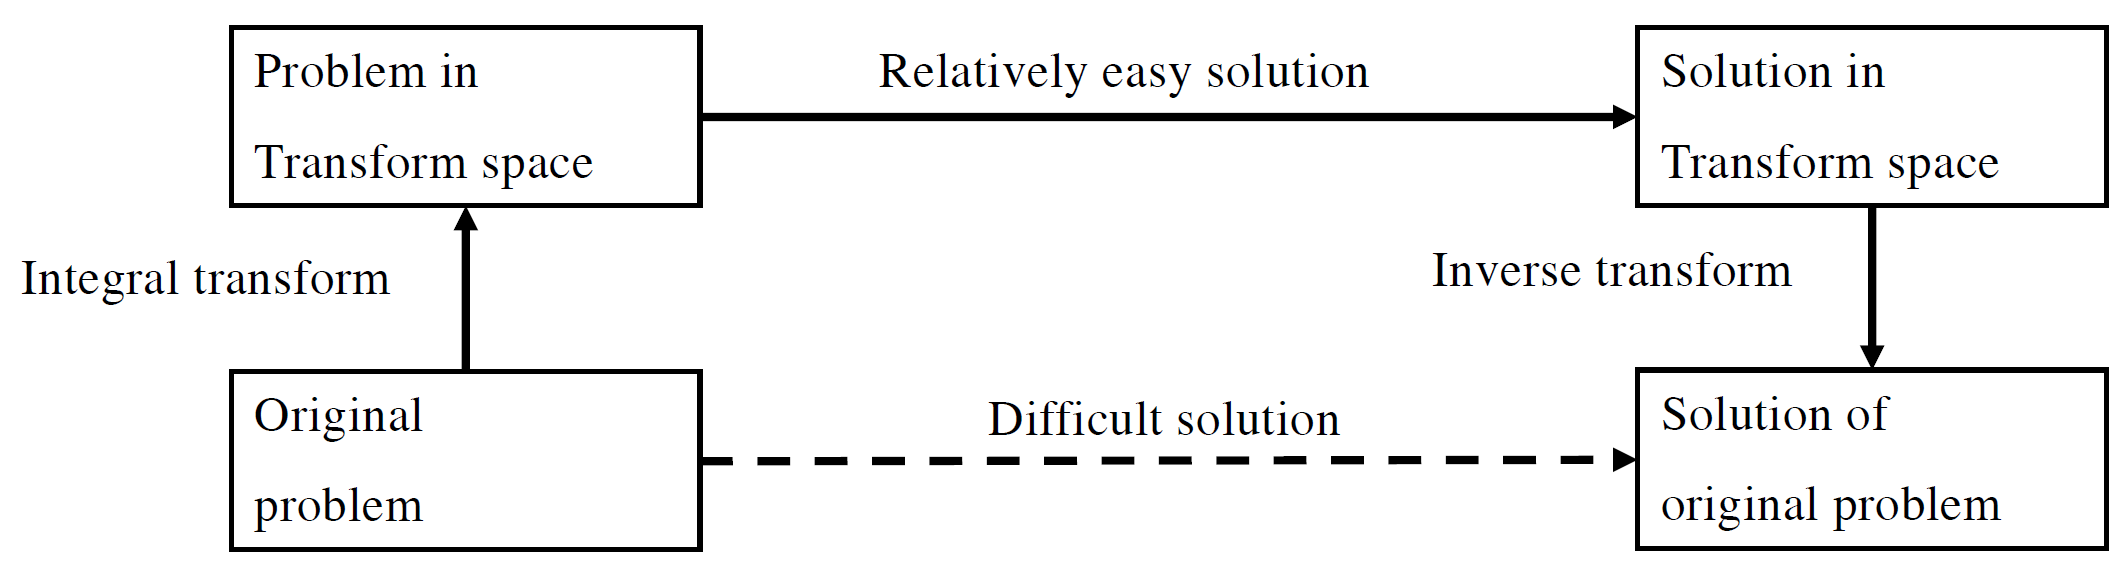


## Fourier Transform
### Continuous (CFT)

Each function defined in spatial or time domain (**real** domain) by some
function $f(t)$, can be presented also in **frequency** or **reciprocal** domain with a function $\hat{f}$ of frequency $\omega$.

**The idea of Fourier Transform:** *functions can be represented as a weighted sum of sines and cosines*.



Given $f\in L^2(\mathbb R)$,
$$\hat f(\omega) \equiv \mathcal{F}(f)(\omega) = \int_{-\infty}^\infty f(x)e^{-i\omega x} dx.$$
Inverse transform:
$$f(x)\equiv \mathcal{F^{-1}}\big(\hat{f}\big)(x) = \frac{1}{2\pi}\int_{-\infty}^\infty \hat{f}(\omega)e^{i\omega x} d\omega.$$

Here we use **angular frequency**: $\omega = 2\pi k$, where $k$ is **ordinary frequency**.



## Examples

### 1. FT of Dirac $\delta$-function: $\displaystyle \int\limits_{-\infty}^{\infty}\delta(t) e^{- i \omega t}dt = 2\pi$:
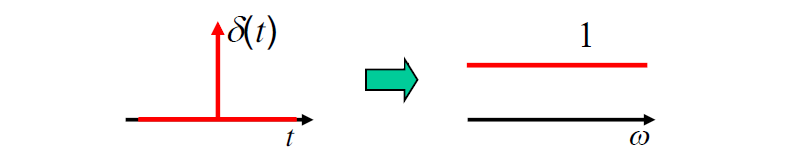


### 2. FT of cos:  
$f = \cos{ax}, x\in [-10,10]$ \\
$\hat{f}(\omega) = 2\pi\frac{\delta(\omega-a) + \delta(\omega+a)}{2}$


In [3]:
x = np.linspace(-10,10,N)
dx = (np.max(x) - np.min(x))/(N-1)
freq = np.fft.fftfreq(N, d=dx)*2*np.pi

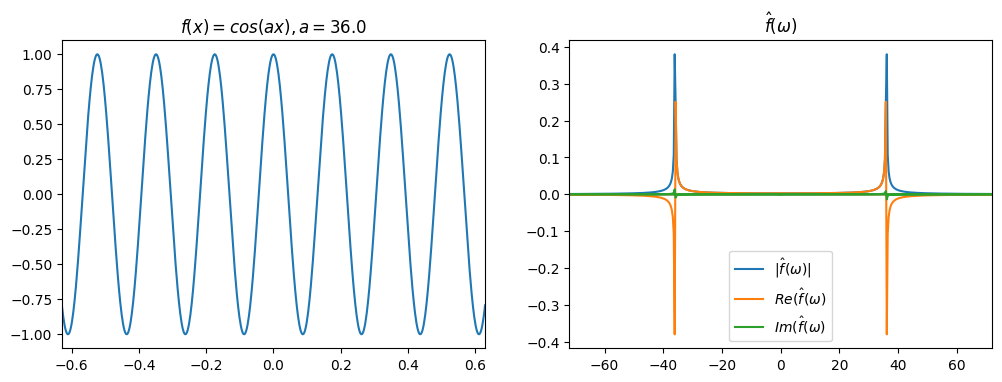

In [4]:
a = 36.0
f = np.cos(a*x)

F = np.fft.fft(f)/N
Fabs = np.abs(F)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax0.set_title('$f(x)=cos(ax), a=$'+str(a))
ax0.set_xlim(-np.pi/5, np.pi/5)
ax0.plot(x, f)

ax1.set_title('$\hat{f}(\omega)$')
ax1.set_xlim(-2*a, 2*a)
ax1.plot(freq, Fabs, label = '|$\hat f(\omega)|$')
ax1.plot(freq, np.real(F), label='$Re(\hat f(\omega)$')
ax1.plot(freq, np.imag(F), label='$Im(\hat f(\omega)$')
plt.legend()
plt.show()

### 2.
FT of $e^{ i\omega_0 t} = 2\pi\delta(\omega - \omega_0)$


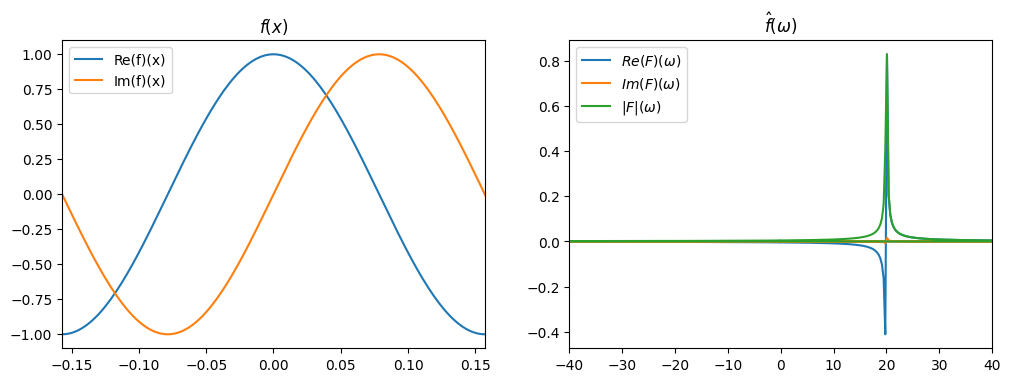

In [5]:
w0 = 20
f = np.exp(w0*1j*x)

F = np.fft.fft(f)/N

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax0.set_title('$f(x)$')
ax0.set_xlim(-np.pi/w0, np.pi/w0)
ax0.plot(x, np.real(f), label='Re(f)(x)')
ax0.plot(x, np.imag(f), label='Im(f)(x)')
ax0.legend()

ax1.set_title('$\hat{f}(\omega)$')
ax1.set_xlim(-2*w0, 2*w0)
ax1.plot(freq, np.real(F), label='$Re(F)(\omega)$')
ax1.plot(freq, np.imag(F), label='$Im(F)(\omega)$')
ax1.plot(freq, np.abs(F), label='$|F|(\omega)$')
ax1.legend()


# Properties
## Correspondence between symmetries in the two domains:
*	$f(x)$ is real  $\Rightarrow  \widehat f(-\omega) = \widehat f^*(\omega)$; \\
*	$f(x)$ is imaginary $\Rightarrow  \widehat f(-\omega) = -\widehat f^*(\omega)$;
*	$f(x)$ is even $\Rightarrow  \widehat f(-\omega) = \widehat f(\omega)$;
*	$f(x)$ is odd $\Rightarrow \widehat f(-\omega) = -\widehat f(\omega)$;
*	$f(x)$ is real and even $\Rightarrow \widehat f(-\omega)$ is real and even;
*	$f(x)$ is real and odd $\Rightarrow \widehat f(-\omega)$ is imaginary and odd;
*	$f(x)$ is imaginary and even $\Rightarrow \widehat f(-\omega)$ is imaginary and even;
*	$f(x)$ is imaginary and odd $\Rightarrow \widehat f(-\omega)$ is real and odd;

**Exercise:** Prove the above properties

## 1. Scaling \& shifting
* $f(x) \Leftrightarrow \hat{f}(\omega)$: Fourier Transform
* $f(ax) \Leftrightarrow \frac{1}{|a|}\hat{f}(\frac{\omega}{a})$: time scaling
* $\frac{1}{|b|}f(\frac{x}{b}) \Leftrightarrow \hat{f}(b\omega)$: frequency scaling
* $f(x-x_0) \Leftrightarrow \hat{f}(\omega)e^{i \omega x_0}$: time shifting
* $f(x)e^{- i \omega_0 x} \Leftrightarrow \hat{f}(\omega-\omega_0)$: frequency shifting

**Exercise:** Prove the above properties


## 2. Linearity

$$
\mathcal{F}\Bigg[\sum_{i} a_i f_i\Bigg] = \sum\limits_{i} a_i \mathcal{F}[{f_i}]
$$

### Spectral analysis
Together with idea, linearity gives us a possibility to analyse frequencies of periodic components (terms) of the function under consideration.





[39.25715965 26.17315294 36.62601072 32.39236326 23.20169413 12.79482034
 21.51701545  6.00910409 14.47039477 21.03028353]
[-1.54898700e+00  2.68496918e-01 -5.68074225e-02 -1.97582157e+00
 -1.25699795e-01 -1.45640819e-03 -1.35749105e+00  1.61456285e+00
 -1.60192297e+00  1.12440520e+00]
freq.shape = (10000,)
Fabs.shape = (10000,)
[189.40328893 205.04541509 207.48171453 ... 182.38664086 207.48171453
 205.04541509]


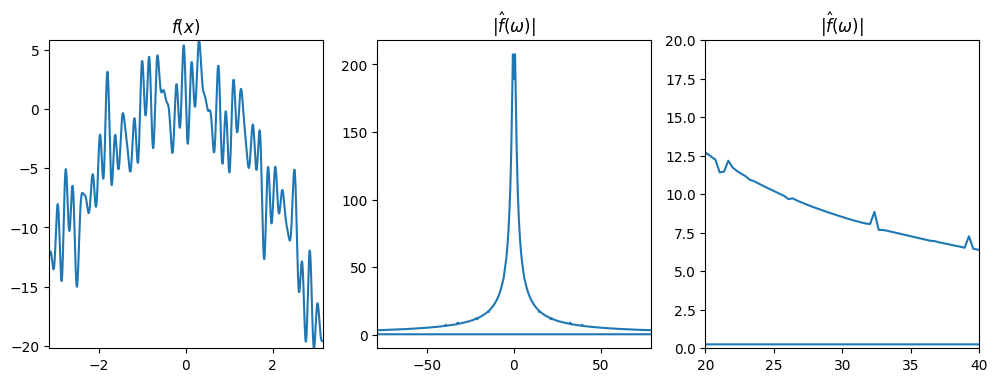

In [51]:
N_freqs = 10
#a = np.abs(40*np.random.randn(N_freqs))
a = np.abs(np.random.uniform(low=1,high=40,size=N_freqs))
amplitudes = np.random.randn(N_freqs)
print(a)
print(amplitudes)

f = np.zeros_like(x)
for i in range(a.shape[0]):
  f += amplitudes[i]*np.sin(a[i]*x)

f+= 0.01*np.exp(-x + np.pi) + 1 - 2*x**2

F = np.fft.fft(f)/N
Fabs = np.abs(F)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax0.set_title('$f(x)$')
ax0.set_xlim(-np.pi, np.pi)
ax0.set_ylim(np.min(f[np.where(np.abs(x) < np.pi)]), np.max(f[np.where(np.abs(x)< np.pi)]))
ax0.plot(x, f)

ax1.set_title('$|\hat{f}(\omega)|$')
ax1.set_xlim(-np.max(a)*2, np.max(a)*2)
print('freq.shape = '+str(freq.shape))
print('Fabs.shape = '+str(Fabs.shape))
print(Fabs)

ax1.plot(freq, Fabs)

ax2.set_title('$|\hat{f}(\omega)|$')
ax2.set_xlim(20.0, 40.0)
ax2.set_ylim(0, 20)
ax2.plot(freq, Fabs)

plt.show()


Original FT subject to some drawbacks in terms of spectral analysis in case of real-valued signals:
* Negative frequencies have no physical sence
* However, the amplitudes are splitted via "mirrored" peaks

### Spectral density
* The **energy spectral density** (ESD) describes the *distribution of energy* into frequency components composing the signal.

$$
\overline{S}(\omega) = |\hat{f}(\omega)|^2
$$

Bartlett's and Welch's methods are most popular methods for estimation of the ESD. The general idea and procedure (source: https://en.wikipedia.org/wiki/Bartlett%27s_method) :
* The original N point data segment is split up into K (non-overlapping for Bartlett's method, and overlapping for Welch's method) data segments, each of length M
* For each segment, compute the periodogram by computing the discrete Fourier transform (DFT version which does not divide by M), then computing the squared magnitude of the result and dividing this by M.
* Average the result of the periodograms above for the K data segments.

The averaging reduces the variance, compared to the original N point data segment. The end result is an array of power measurements vs. frequency "bin".

Text(0.5, 0, '$\\omega$')

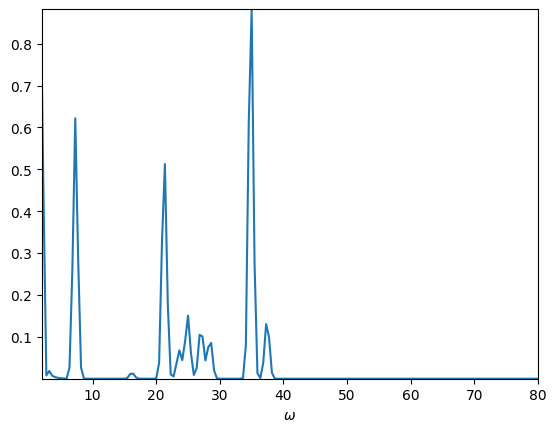

In [49]:
freqs, spectrum = scs.welch(f, nperseg=7000, noverlap=2500, fs=10000/np.pi, window='blackmanharris')

min_freq = 2
max_freq = 80

band = np.where((freqs >= min_freq) & (freqs <= max_freq))
min_s, max_s = np.min(spectrum[band]), np.max(spectrum[band])
plt.plot(freqs, spectrum)
plt.xlim((min_freq, max_freq))
plt.ylim((min_s, max_s))
plt.xlabel('$\omega$')


(65536,)
(65536,)


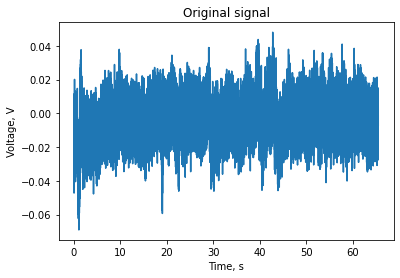

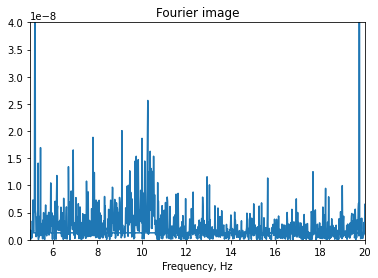

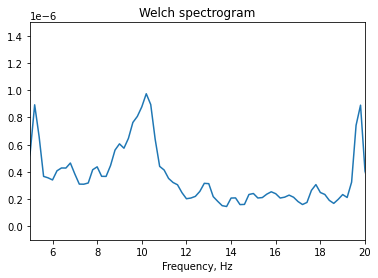

In [ ]:
from google.colab import files

#uploaded = files.upload()

signal = np.loadtxt('A1N_ch1.txt')
print(signal.shape)

fs = 1e3
time = np.arange(0, signal.shape[0])/fs
print(time.shape)

plt.plot(time, signal)
plt.title('Original signal')
plt.xlabel('Time, s')
plt.ylabel('Voltage, V')
plt.show()


F_signal = np.fft.fft(signal)
freqs = np.fft.fftfreq(signal.shape[0], d=1/fs)

plt.plot(freqs, np.abs(F_signal)**2/signal.shape[0]**2)
plt.title('Fourier image')
plt.xlabel('Frequency, Hz')
plt.xlim([5, 20])
plt.ylim([0, 0.4e-7])
plt.show()

freqs, spectrogram = scs.welch(signal, fs=1e3, window='blackmanharris', nperseg=5000, scaling='density')
plt.plot(freqs, spectrogram)
plt.title('Welch spectrogram')
plt.xlabel('Frequency, Hz')
plt.xlim([5,20])
plt.ylim([-0.1e-6, 0.15e-5])
plt.show()

## 3. Decay of Fourier Image
* If $f \in L_1(-\infty, \infty)$, then
$$
\hat f(\omega) \in C(-\infty, \infty); \quad |\hat f(\omega)| < \infty; \quad \lim_{|\omega|\to\infty} \hat f(\omega) = 0
$$

* If $f \in C^m(-\infty, \infty)$, then
$$
\lim_{|\omega|\to \infty} \Big|{\hat f(\omega)}{|\omega|^m}\Big| \to 0
$$

### 3.1. Compact support
* FT of compactly supported function is non-compactly supported.
* FT of non compactly supported function may be both compactly or non-compactly supported

See the page: https://en.wikipedia.org/wiki/Paley%E2%80%93Wiener_theorem

## 4. Derivatives
$$
\mathcal{F}\big[f'(x)\big] = -i \omega \mathcal{F}[f];
$$
$$
\mathcal{F}\big[f^{(n)}(x)\big] = (-i \omega )^n \mathcal{F}[f].
$$

**Exercise:** Proove the above equalities

### Possible application:
Consider heat transfer equation:
$$
\frac{\partial u}{\partial t}(x,t) =
 \frac{\partial^2 u}{\partial x^2}(x,t), \quad x\in \mathbb{R}^2,
$$
$$
u(x,0) = u_0(x)
$$
Apply the FT wrt $x$ to the above equation:

$$
\frac{\partial \widehat u}{\partial t}(\omega, t) = -\omega^2 \widehat u(\omega, t)
$$

$$
\widehat u(\omega, 0) = \widehat u_0(\omega)
$$

The latter problem has an obvious solution:
$$
\widehat u(\omega, t) = e^{-\omega^2 t} \widehat u_0(\omega)
$$

Applying the inverse FT to this solution, we obtain:
$$
u(x,t) = \frac{1}{2\sqrt{\pi t}} \int\limits_{-\infty}^{\infty} \exp \Bigg(-\frac{\xi^2}{4t}\Bigg) u_0(x - \xi)d\xi
$$

The latter solution is **Poisson's integral** for heat transfer equation. It was obtained using the formula
$$
\widehat{e^{-ax^2}} = 2\pi \exp\Bigg(-\frac{\omega^2}{4a}\Bigg)
$$
together with the convolution theorem (see later).



## 5. Unitariness (Parseval's/Plancherel's theorem)

Fourier Transform saves energy (the $L^2$ norm):
$$
|| f(x)||_{L^2} = ||\hat{f}(\omega)||_{L^2},
$$
or
$$
\int\limits_{-\infty}^{+\infty} |f(x)|^2 dx = \int\limits_{-\infty}^{+\infty} |\hat{f}(\omega)|^2 d\omega
$$


## Cross-Correlation Theorem & spectral analysis

### Cross-Correlation
The **Cross Correlation** is a measure of similarity of two series $f(t) \in L_2, g(t) \in L_2$ as a function of the displacement of one relative to the other:
$$
(f\star g)(\tau) = \int\limits_{-\infty}^{\infty} dt f^*(t)g(t+\tau) \equiv \int\limits_{-\infty}^{\infty} dt f^*(t-\tau)g(t)
$$

Here $^*$ means the complex conjugation.

Used for:
* Pattern recognitioin
* Averaging
* Cryptoanalysis
* Spectral analysis

### Autocorrelation
**Autocorrelation** or **serial correlation** is the correlation of a signal with a delayed copy of itself as a function of delay:
$$
R_{ff}(\tau) = f\star f = \int\limits_{-\infty}^{\infty} dt f(t+\tau) f^*(t) \equiv \int\limits_{-\infty}^{\infty} dt f(t) f^*(t-\tau)
$$

* **Correlation theorem:**
$$
\mathcal{F} (g\star h)(\omega) = \hat{g}^{*}(\omega)\hat{h}(\omega) \quad \Rightarrow \quad \mathcal{F}(g\star g)(\omega) = |\hat{g}(\omega)|^2
$$

* **Wiener-Khinchin theorem:** *Spectral density of the signal can be estimated as FT of $R_{ff}$*
$$
\overline{S}(\omega) = \mathcal{F}\big( R_{ff}(\tau) \big)
$$
Due to correlation theorem (compare with definition of ESD):
$$
\overline{S}(\omega) = |\hat{f}(\omega)|^2
$$



## Convolution
$$
g(\mathbf{x}) = k\ast f\equiv \int\limits_{\mathbb{R}^n} k(\mathbf{x}-\xi) f(\xi) d\xi, \quad \mathbf{x}, \xi \in \mathbb{R}^n
$$

### Convolution theorem (Convolution \& FT):
$$
\mathcal{F}(k\ast f) = \mathcal{F}(f)\mathcal{F}(k).
$$

## Discrete convolution via FFT

Discrete convolution:
$$(f*g)[n]=\sum_{k\in\mathbb Z}f[k]g[n-k].$$
Here, $k$ runs over $\mathbb Z$ or over $\mathbb Z_N = \mathbb Z/(N\mathbb Z)=\{0,1,\ldots,N-1\}.$

The direct computation of convolution requires $O(N^2)$ operations. But $$\widehat{f*g}=\widehat{f}\cdot\widehat{g},$$
so computing convolution by $f*g=(\widehat{f}\cdot\widehat{g})^\vee$ requires only $O(N\log N)$ operations for good $N$.

**Example: denoising a signal.** Let $$f[n] = g[n]+\epsilon\xi_n,$$

where $\xi_n\sim \mathcal N(0,1)$ are i.i.d random variables (the noise). We estimate $g$ from $f$ by convolving $f$ with a smoothing kernel $h$ (for example, $h[n]=\frac{1}{2M+1}\mathbb 1_{[-M,M]}$).

RMS reconstruction error: 0.012541367709555053
Reconstruction time: 0.0015218257904052734


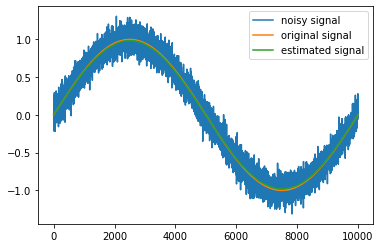

In [ ]:
N = 10000
g = np.sin(2*np.pi*np.linspace(0,1,N)) # original signal
xi = np.random.normal(size=(N,))
epsilon = 1e-1
f = g+epsilon*xi # noisy signal

M = 1000
h0 = np.ones((M,))
h0 /= np.sum(h0) # smoothing kernel is
# embed h0 in Z_N
h = np.zeros((N,))
h[:M//2] = h0[M//2:]
h[-M//2:] = h0[:M//2]

t0 = time.time()
f_fft = np.fft.fft(f)
h_fft = np.fft.fft(h)
g_estimated = np.fft.ifft(f_fft*h_fft)
t1 = time.time()
print ('RMS reconstruction error:', np.linalg.norm(g_estimated-g)/np.sqrt(N))
print ('Reconstruction time:', t1-t0)

plt.plot(f, label='noisy signal')
plt.plot(g, label='original signal')
plt.plot(np.real(g_estimated), label='estimated signal')
plt.legend()
plt.show()

**Exercise:** Estimate theoretically the optimal size $M$ of the kernel $h$ in this example (kernels with larger $M$ better eliminate the noise, but have worse localization) and check the result by a numerical experiment.

## FT in higher dimensions

Continuous:

$$\widehat f(\mathbf p)=\int_{\mathbb R^d} f(\mathbf x)e^{-i\mathbf p\cdot \mathbf x} d\mathbf x.$$

Discrete, for an array of size $N_1\times\ldots \times N_d$:

$$\widehat f[k_1,\ldots,k_d]=\sum_{n_1=0}^{N_1-1}\ldots\sum_{n_d=0}^{N_d-1} e^{-2\pi i\sum_{q=1}^d\frac{k_s n_s}{N_s}} f[n_1,\ldots,n_d], \quad k_s\in \{0,1,\ldots N_s-1\}.$$



## 2D Convolution examples

$$
f\ast K = \iint\limits_{\mathbb{R}^2} f(x-\xi, y-\eta) K(\xi, \eta) d\xi d\eta
$$
or, using the convolution theorem:
$$
f\ast K = \mathcal{F}^{-1} \Big[ \hat{f}\hat{K} \Big],
$$
where by $\hat\cdot$ we now mean the 2D Fourier Transform.


In [ ]:
def convolution(image, kernel):
  FT_kernel = np.fft.fft2(kernel)
  FT_image = np.fft.fft2(image)

  FT_result = FT_image * FT_kernel
  result = np.fft.ifft2(FT_result)

  result = np.fft.fftshift(result)
  return result

In [ ]:
def show(image, kernel, result):
  FT_kernel = np.fft.fft2(kernel)
  fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
  ax0.imshow(image, cmap='gist_gray')
  ax0.set_title('Original image')

  ax1.imshow(kernel)
  ax1.set_title('Kernel')

  ax2.imshow(np.abs(np.fft.fftshift(FT_kernel)))
  ax2.set_title('FT of kernel (modulus)')

  ax3.imshow(np.real(result), cmap='gist_gray')
  ax3.set_title('Convolution result (Real part)')


  plt.show()


### Example 1: smeared images

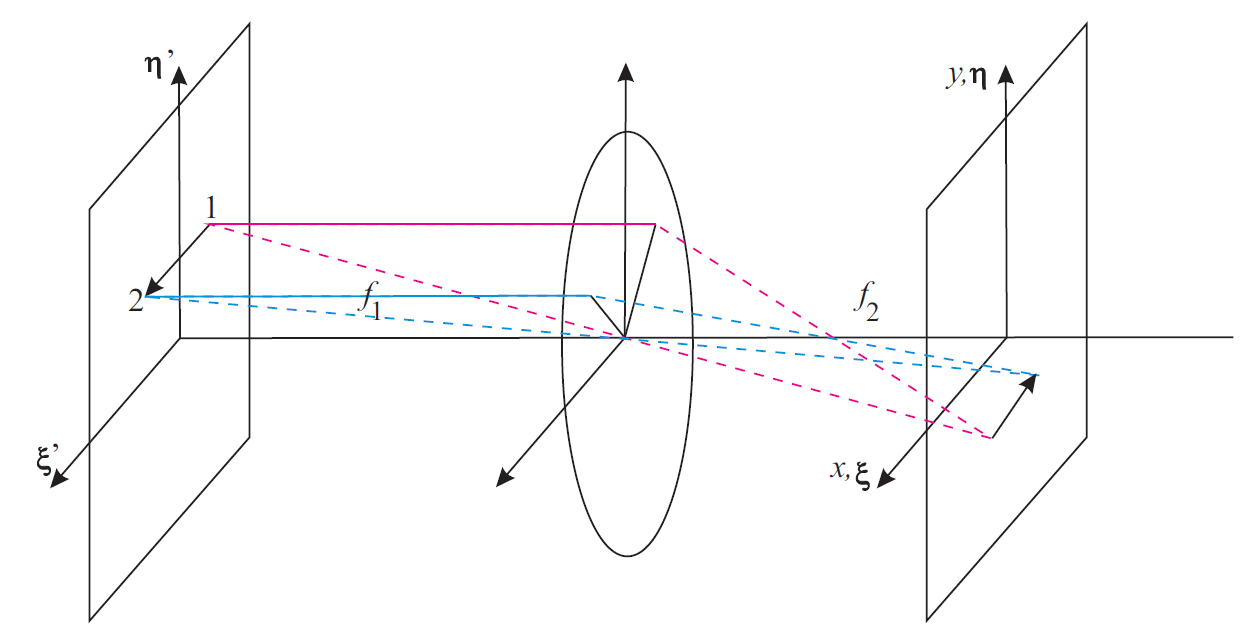

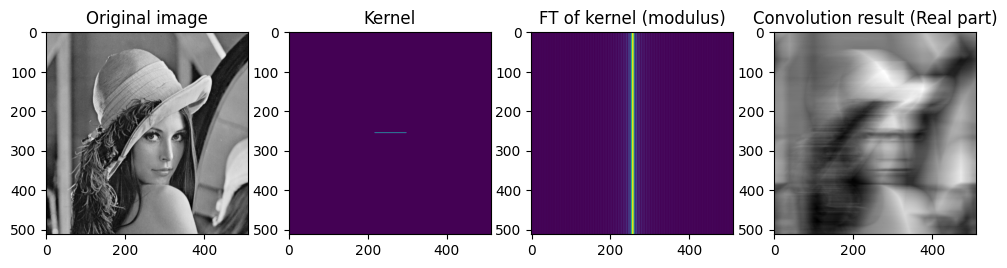

Norm of real part: 5217622.885239216
Norm of imag part: 2.093610990275198e-10


In [ ]:
from skimage import io
image = io.imread('https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif')

Nx,Ny = image.shape[0], image.shape[1]
image = image[:,:,0]
r = 40
kernel = np.zeros_like(image)
kernel[int(Nx/2), int(Ny/2)-r:int(Ny/2+r)] = 1.0

# Convolving image with kernel
result = convolution(image, kernel)

# Drawing the result
show(image, kernel, result)


print('Norm of real part: '+str(np.linalg.norm(np.real(result))))
print('Norm of imag part: '+str(np.linalg.norm(np.imag(result))))


### Example 2: Defocused image
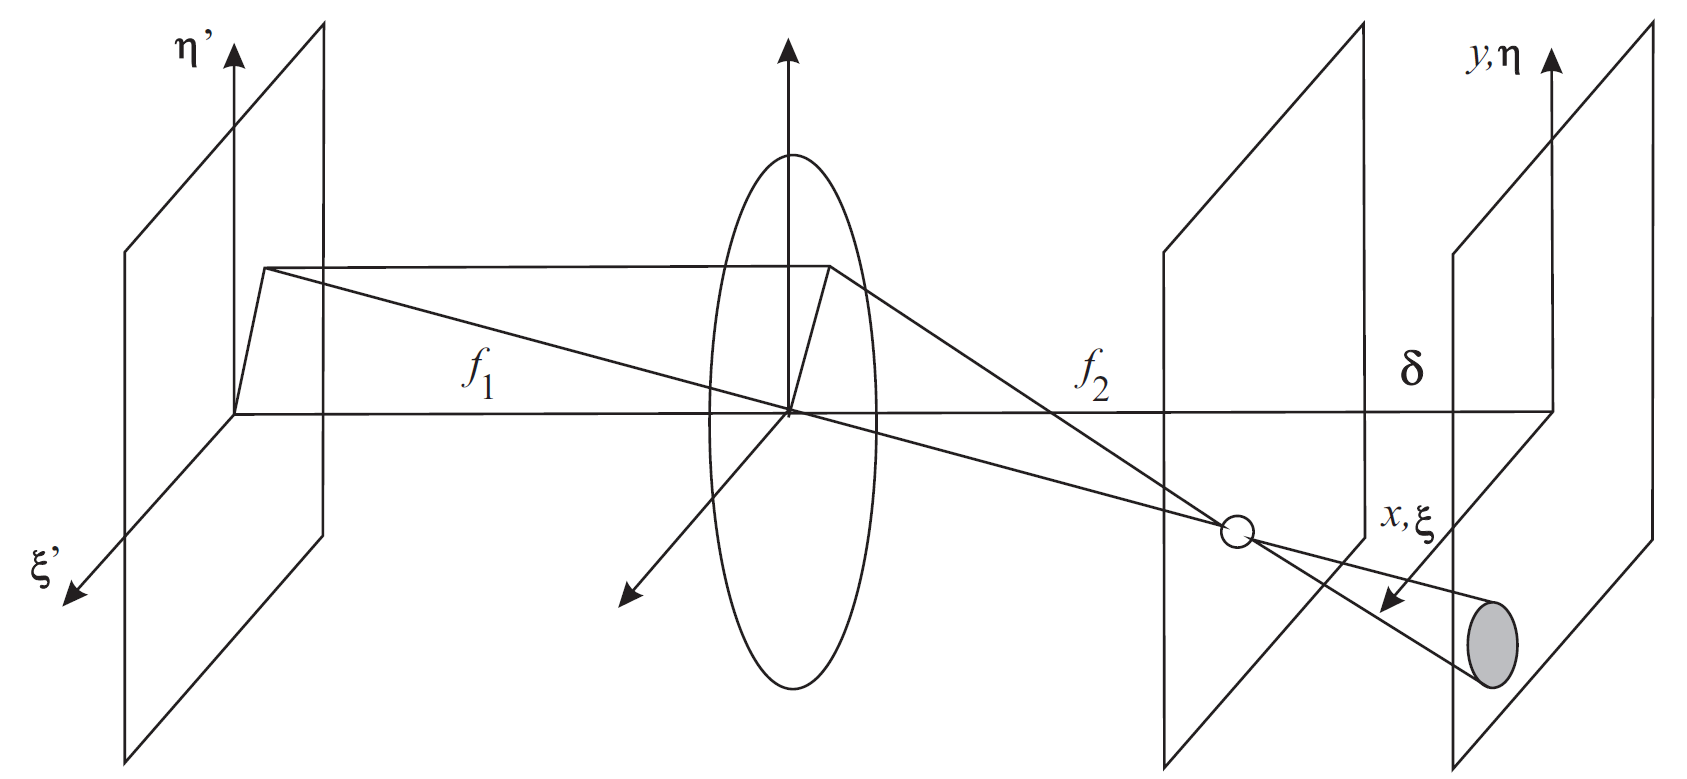

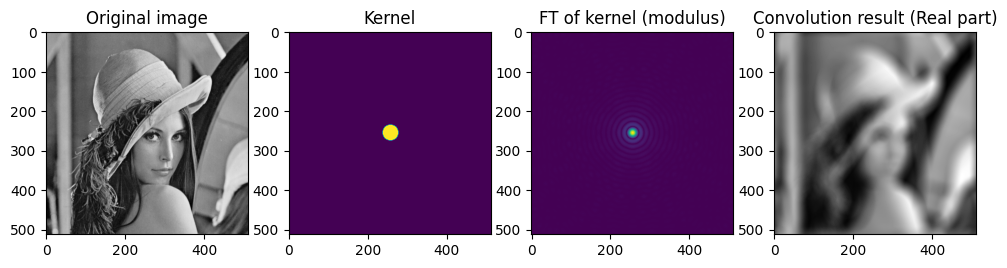

In [ ]:
Nx,Ny = image.shape
r = 20
x = np.linspace(-int(Nx/2), int(Nx/2), Nx)
y = np.linspace(-int(Ny/2), int(Ny/2), Ny)
xx,yy = np.meshgrid(x,y)
kernel = np.zeros_like(image)
kernel[np.where(xx**2 + yy**2 <= r**2)] = 1.0

result = convolution(image, kernel)

#Drawing the result
show(image, kernel, result)


### Example 3: mirror-kind defocusation
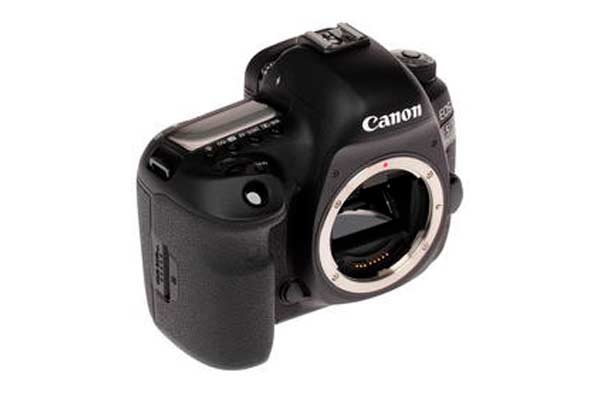




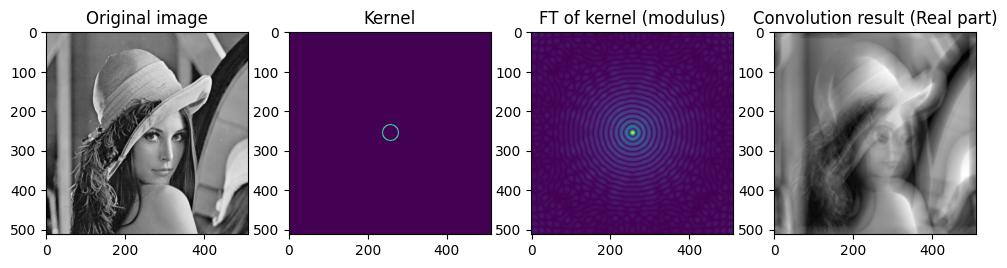

In [ ]:
Nx,Ny = image.shape
r = 20
x = np.linspace(-int(Nx/2), int(Nx/2), Nx)
y = np.linspace(-int(Ny/2), int(Ny/2), Ny)
xx,yy = np.meshgrid(x,y)
kernel = np.zeros_like(image)

eps = 1
kernel[np.where((xx**2 + yy**2 <= (r+eps)**2) & (xx**2 + yy**2 >= (r-eps)**2) )] = 1.0

result = convolution(image, kernel)

show(image, kernel, result)

### Example 4: smooth gaussian kernel

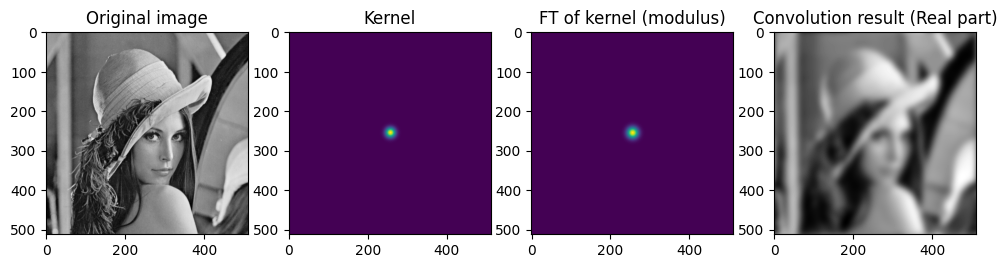

In [ ]:
Nx,Ny = image.shape
r = 40
x = np.linspace(-int(Nx/2), int(Nx/2), Nx)
y = np.linspace(-int(Ny/2), int(Ny/2), Ny)
xx,yy = np.meshgrid(x,y)
kernel = np.zeros_like(image)

sigma = 12
kernel = np.exp(-(xx**2/sigma**2 + yy**2/sigma**2))



result = convolution(image, kernel)

show(image, kernel, result)

### Comparison with implemented in Python functions

In [ ]:
start = time.time()
result_convolution = np.real(convolution(image, kernel))
end = time.time()
time_convolution = end - start
print('Our convolution function took '+str(time_convolution)+' sec.')

start = time.time()
result_convolve_fft = scs.fftconvolve(image, kernel, mode='same')
end = time.time()
time_scs_fftconvolve = end - start
print('scipy.signal.fftconvolve took '+str(time_scs_fftconvolve)+' sec.')

start = time.time()
result_scs_convolve = scs.convolve2d(image, kernel, mode='same')
end = time.time()
time_scs_convolve = end - start
print('scipy.signal.convolve took '+str(time_scs_convolve)+' sec.')

Our convolution function took 0.02400040626525879 sec.
scipy.signal.fftconvolve took 0.03372550010681152 sec.
scipy.signal.convolve took 99.5923957824707 sec.


**Exercise:** Implement 2D image denoising using convolution

## Restoration of blurred images is ill-posed!

Let:
* $B = \{x,y: |x|<a, |y|<b\} \in \mathbb{R}^2$ be a frame.
* $z(x,y),\quad x,y\in B$ be a distribution of intensity of color over $B$ in **sharp** image
* $K(x,y)$ - the kernel depending on the hardware and particular phenomenon of blurring.
* $g(\xi, \eta), \quad \xi, \eta \in B$ - distribution of color over $B$ in registered (blurred) image


These distributions are connected with the following equation (Convolution type Fredholm integral equation of the 1$^{st}$ kind:
$$
g = z * K
$$

In real measurements, the function $g$ is noisy:
$$
g(x,y) = g_p(x,y) + \delta(x,y)
$$

Due to convolution theorem,
$$
\widehat g \equiv \hat{g}_p + \hat{\delta} = \widehat z  \widehat K.
$$
Thus, assumming $\widehat K \neq 0\quad \forall \xi, \eta$:
$$
\widehat z = \frac{\widehat g_p}{\widehat K} + \frac{\widehat\delta}{\widehat K},
$$
and thus,
$$
z(x,y) = \mathcal{F^{-1}} \Bigg(\frac{\widehat g_p}{\widehat K}\Bigg) + \mathcal{F^{-1}}\Bigg(\frac{\widehat\delta}{\widehat K}\Bigg)
$$
Consider the last term in the right-hand side of the latter equality. Both functions $\widehat K$ and $\widehat\delta$ are not compactly supported functions (due to compact support in space domain); the inverse Fourier transform:

$$
\mathcal{F^{-1}}\Bigg(\frac{\widehat\delta}{\widehat K}\Bigg) = \iint\limits_{-\infty}^{\infty} \frac{\widehat\delta (\xi, \eta)}{\widehat K(\xi, \eta)} e^{i(x\xi + y\eta)} d\xi d\eta
$$
assumes the integration over the whole $\mathbb{R}^2$ space. Due to stochastic nature of the noise, the limits
$
\displaystyle\lim_{|\xi|,|\eta| \to \infty} \frac{\widehat\delta (\xi, \eta)}{\widehat K(\xi, \eta)}
$ may not exist, and the latter integral might therefore diverge. Even if it is converging, it can unpredictably affect on the solution $z(x,y)$ will therefore be unstable with respect to this noise.


# Short-time Fourier Transform

Problems of FT:
* By using Fourier Transform , we loose the time information : **WHEN**
did a particular event take place ?
* FT can not locate drift, trends, abrupt changes, beginning and ends of events,	etc.
* Calculating use complex numbers.

In order to analyze small section of a signal, Denis Gabor (1946),
developed a technique, based on the FT and using windowing :
*STFT* or *Short-time Fourier Transform*:

* A compromise between time-based and frequency-based views of a signal.
* both time and frequency are represented in limited precision.
* The precision is determined by the size of the window.
* Once you choose a particular size for the time window - it will be the same for	all frequencies.


### Continuous case
Fix a real function $g$ such that $g(-x)=g(x)$ and $\|g\|=1$. For any numbers $u,p$ define the shift of $g$ by $u$ in time and by $p$ in frequency:
$$g_{u,p}(x) = e^{ipx}g(x-u).$$
**STFT** of $f$:
$$Sf(u,p)=\langle f, g_{u,p}\rangle = \int_{-\infty}^\infty f(x) g(x-u)e^{-ipx}dx.$$
**Spectrogram:**
$$P_Sf(u,p)=|Sf(u,p)|^2.$$
**Inversion theorem:**
$$f(x)=\frac{1}{2\pi}\int_{-\infty}^\infty\int_{-\infty}^\infty Sf(u,p)g(x-u)e^{ipx}dudp$$
and
$$\int_{-\infty}^\infty |f(x)|^2dx = \frac{1}{2\pi}\int_{-\infty}^\infty\int_{-\infty}^\infty |Sf(u,p)|^2dudp$$

### Discrete case (similar)
**STFT** of $f$:
$$Sf[m,l]=\sum_{n=0}^{N-1} f[m]g[m-n]e^{-\frac{2\pi i lm}{N}}.$$
**Inversion theorem:**
$$f[x]=\frac{1}{N}\sum_{m=0}^{N-1}\sum_{m=0}^{N-1} Sf[m,l]g[n-m]e^{\frac{2\pi iln}{N}}$$
and
$$\sum_{n=0}^{N-1}|f[n]|^2=\frac{1}{N}\sum_{m=0}^{N-1}\sum_{l=0}^{N-1}|Sf[m,l]|^2.$$



Text(0.5, 1.0, 'Toeplitz matrix (matrix of convolution with g)')

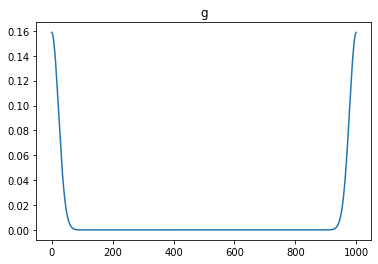

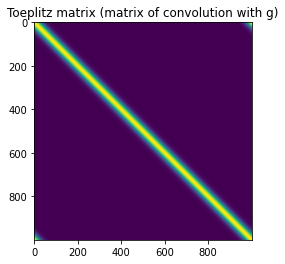

In [ ]:
N = 1000
# a Gaussian g
x = np.linspace(0, np.sqrt(N), N)
g = np.zeros((N,))
g[:N//2] = np.exp(-x[:N//2]**2)
g[-N//2:] = g[N//2:0:-1]
g /= np.sqrt(np.sum(g*g))
plt.plot(g)
plt.title('g')

from scipy.linalg import toeplitz
t = toeplitz(g)
plt.figure()
plt.imshow(t)
plt.title('Toeplitz matrix (matrix of convolution with g)')

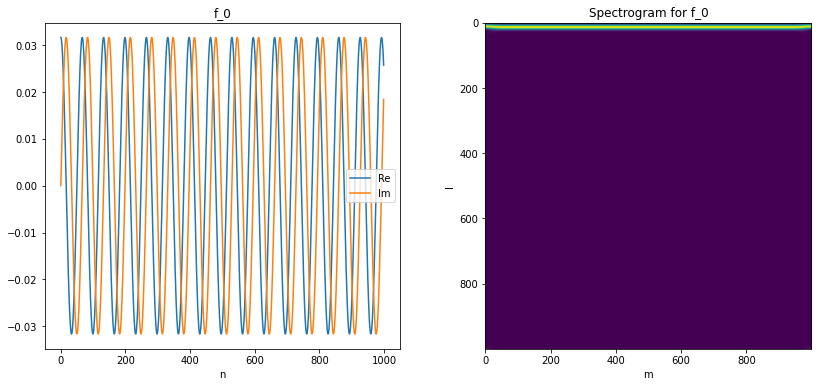

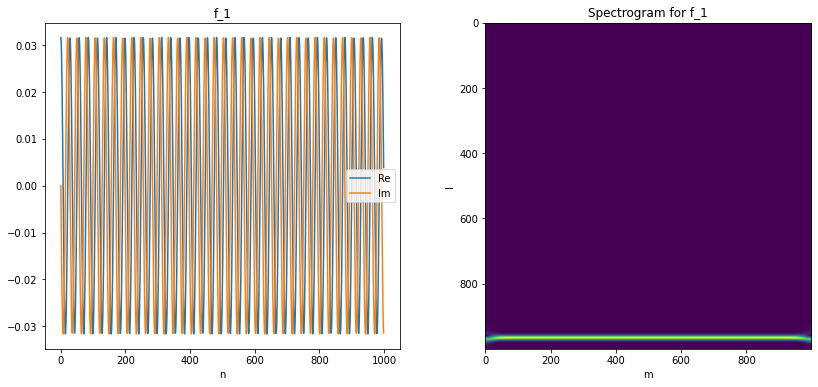

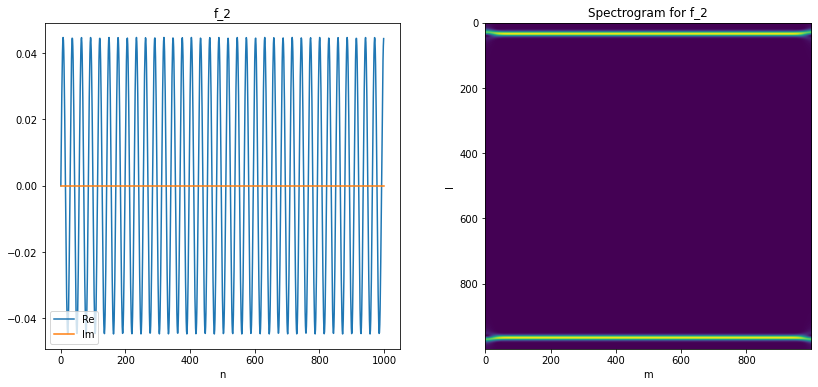

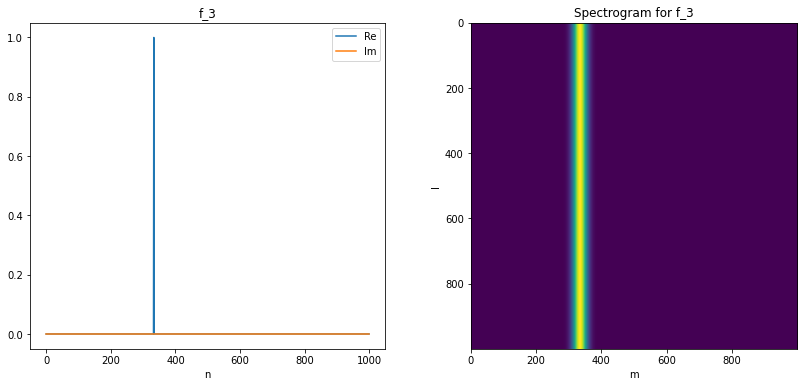

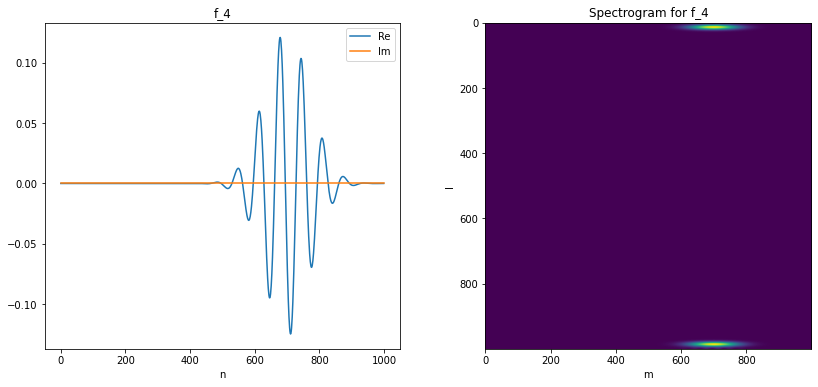

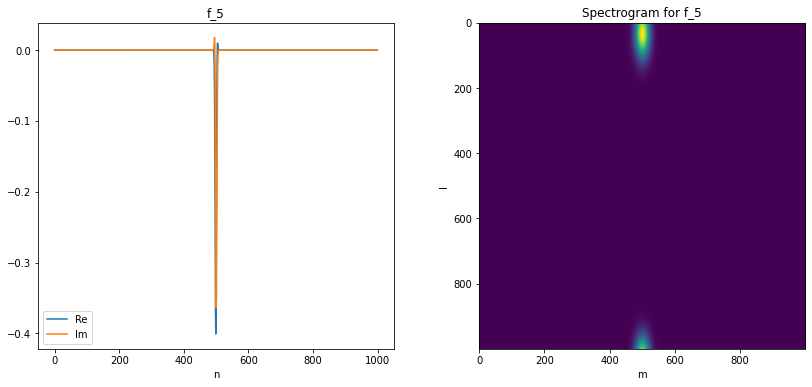

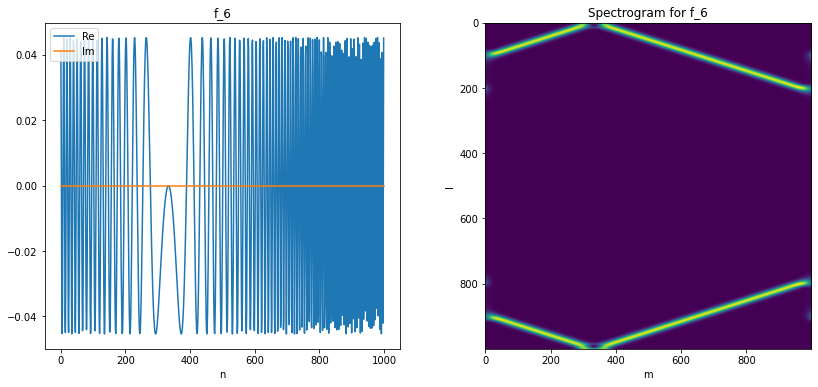

In [ ]:
%matplotlib inline
def get_S(f): # the STFT
    return np.fft.fft(t*f, axis=1)

# test signals
fList = [np.exp(1j*3*x),                                        # f_0
         np.exp(-1j*7*x),                                       # f_1
         np.sin(7*x),                                           # f_2
         (x == x[int(N/3)]).astype('float'),                     # f_3
         np.exp(-1e-1*(x-0.7*np.sqrt(N))**2)*np.sin(3*x),       # f_4
         np.exp(-1e2*(x-0.5*np.sqrt(N))**2)*np.exp(1j*7*x),     # f_5
         np.sin(-(x-np.sqrt(N)/3)**2),                           # f_6
        ]

for k in range(len(fList)):
    f = fList[k]
    f /= np.sqrt(np.sum(f.real**2+f.imag**2))
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(f.real, label='Re')
    plt.plot(f.imag, label='Im')
    plt.xlabel('n')
    plt.legend()
    plt.title('f_%d' %(k))

    S = get_S(f)
    P = S.real**2+S.imag**2
    #plt.figure()
    plt.subplot(1,2,2)
    plt.imshow(P.T)
    plt.xlabel('m')
    plt.ylabel('l')
    plt.title('Spectrogram for f_%d' %(k))

assert np.abs(np.sum(P)/N-1) < 1e-8

# Wavelet Analysis

Despite existence of STFT, many signals require a more flexible approach - so we can vary the window size to determine more accurately either time or
frequency.

### The wavelet:
* A wavelet is a waveform of effectively limited duration that
has an average value of zero.
* Short time localized waves with zero integral value.
* Possibility of time shifting.
* Flexibility.

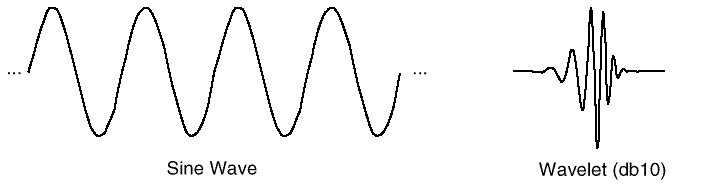

For easier understanding, consider the 1D wavelets in a time domain.
* $x(t)$ - time-evolving signal.
* The Mother Wavelet: $\Psi(t)$.
* Daughter Wavelets: $\Psi(\frac{t-b}{a})$ - shifted and scaled versions of the MW.
* Continuous Wavelet Transform (CWT):
	$$
		X(a, b) = \frac{1}{|a|^{1/2}}\int\limits_{\mathbb{R}} dt x(t) \Psi^*\Big(\frac{t-b}{a}\Big)
	$$
* Continuous Inverse Wavelet Transform:
	$$
		x(t) = \frac{1}{C_\Psi} \iint\limits_{\mathbb{R}^2} X(a, b)
		\frac{1}{|a|^{1/2}}\tilde{\Psi}\Big(\frac{t-b}{a}\Big)db\frac{da}{a^2}
	$$
* $C_{\Psi}$ - the admission constant; $\tilde{\Psi}$ - dual wavelet.

### Brief explanation
*  A mathematical representation of the Fourier transform:
	\begin{equation*}
		F(\omega) = \int\limits_{-\infty}^{\infty} f(t)e^{-i\omega t}dt
	\end{equation*}
*  Meaning: the sum over all time of the signal $f(t)$ multiplied by a complex exponential, and the result is the Fourier coefficients $F(\omega)$
* Those coefficients, when multiplied by a sinusoid of appropriate frequency $\omega$	yield the constituent sinusoidal component of the original signal:

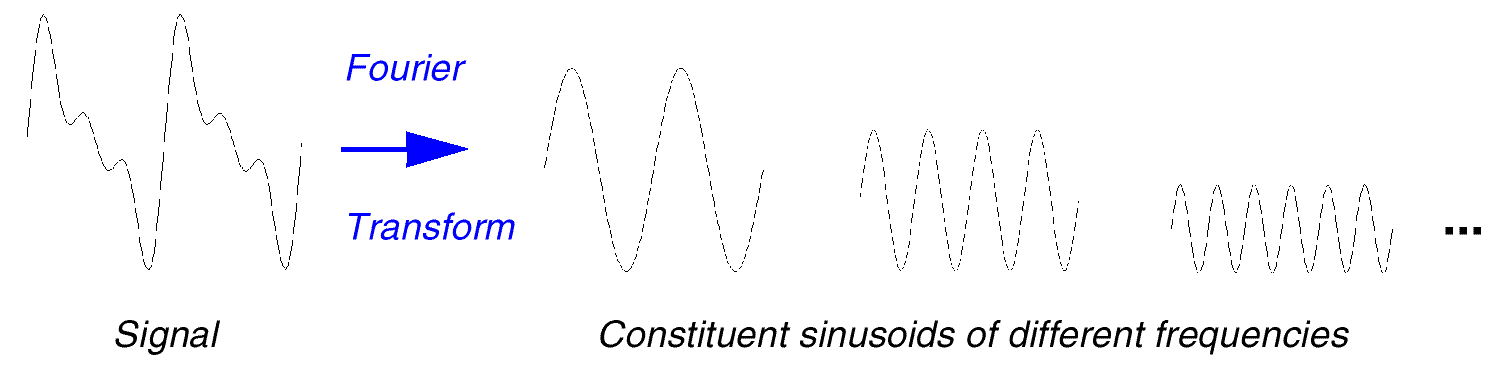


* And the result of the CWT are Wavelet coefficients .
* Multiplying each coefficient by the appropriately scaled and shifted 	wavelet yields the constituent wavelet of the original signal:

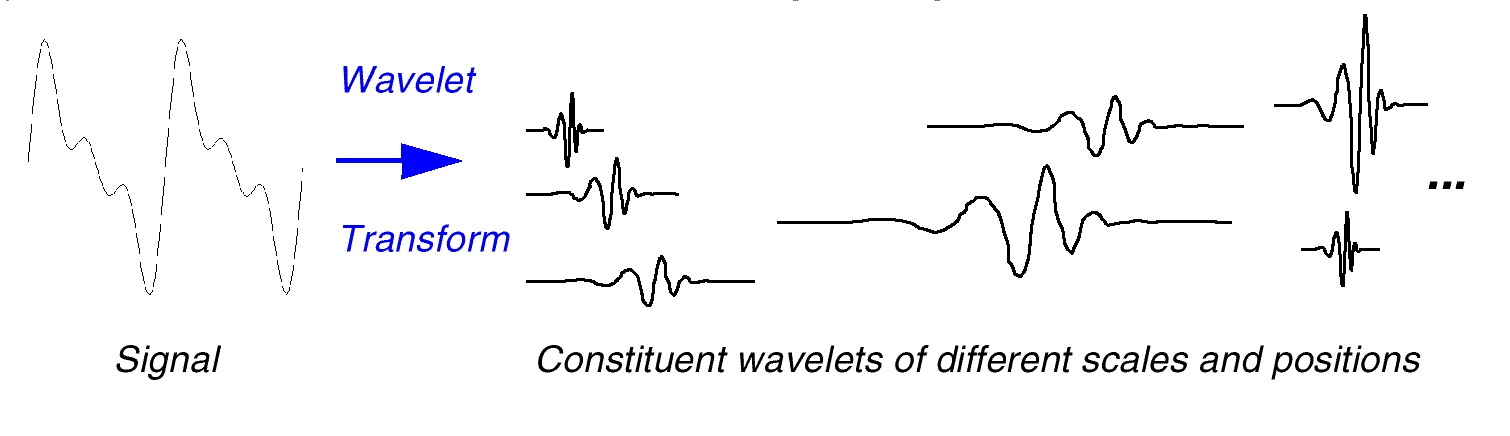


### Scaling wavelets
* Wavelet analysis produces a time-scale view of the signal.
* Scaling means stretching or compressing of the signal.
* Example: scale factor $a$ for sine waves:

$$
f(t) = sin(t); \quad a=1
$$
$$
f(t) = sin(\frac{1}{a} t) = sin(2t); \quad a=2
$$
$$
f(t) = sin(\frac{1}{a} t) = sin(4t); \quad a=4
$$

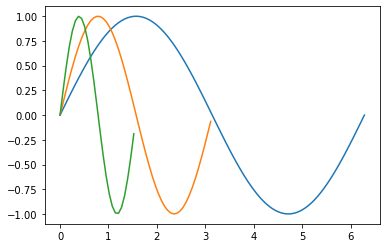

In [ ]:
t = np.linspace(0, 2*np.pi, 100)
f1 = np.sin(t)
f2 = np.sin(2*t)
f3 = np.sin(4*t)

plt.plot(t, f1, label='a=1')
plt.plot(t[np.where(t<2*np.pi/2)], f2[np.where(t<2*np.pi/2)], label='a=2')
plt.plot(t[np.where(t<2*np.pi/4)], f3[np.where(t<2*np.pi/4)], label='a=4')
plt.legend()

### The wavelet function

$$
		\Psi_{a,b}(x) = \frac{1}{\sqrt{a}}\Psi\Big(\frac{x-b}{a}\big),
$$
where

* b - shift coefficient
* a - scale factor
* The scale factor works exactly the same with wavelets. Consider it for *Ricker* or *Mexican widehatWavelet* function.


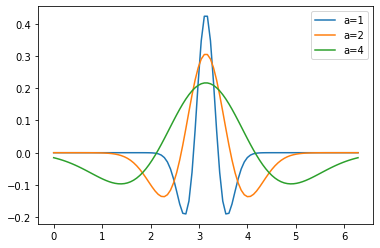

In [ ]:
a=4
N=t.shape[0]
f1 = scs.ricker100(N, a)
f2 = scs.ricker(N, a*2)
f3 = scs.ricker(N, a*4)

plt.plot(t, f1, label='a=1')
plt.plot(t, f2, label='a=2')
plt.plot(t, f3, label='a=4')
plt.legend()

**2D wavelet function**

$$
		\Psi_{a,b_x, b_y}(x,y) = \frac{1}{|a|}\Psi\Big(\frac{x-b_x}{a},\frac{y-b_y}{a}\big),
$$

### Step-by-step explanation

**Step 1:** Take a Wavelet and compare it to a section at the start of the
original signal.

**Step 2:** Calculate a number, C, twidehatrepresents how closely correlated
the wavelet is with this section of the signal. The higher C is,
the more the similarity.

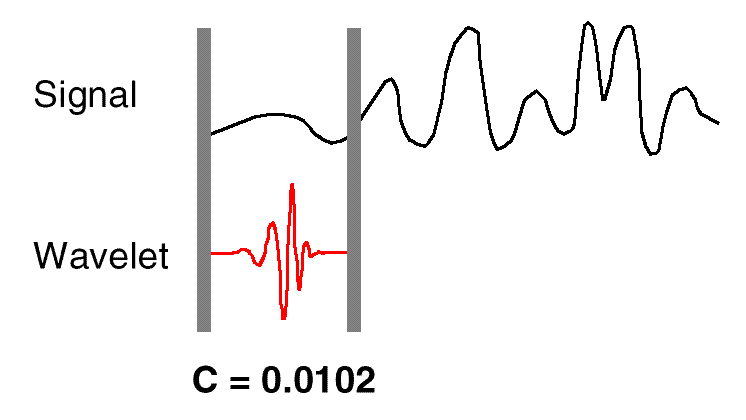


**Step 3:** Shift the wavelet to the right and repeat steps 1-2 until you’ve
covered the whole signal

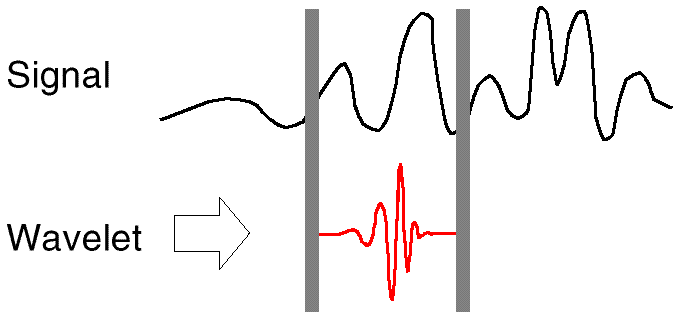

**Step 4:** Scale (stretch) the wavelet and repeat steps 1-3

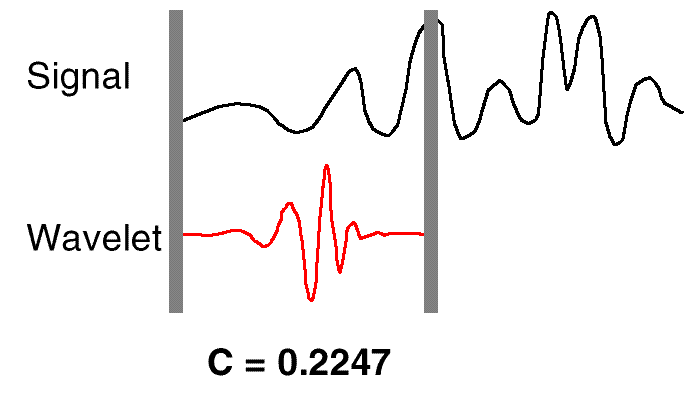

/usr/local/lib/python3.7/dist-packages/scipy/signal/wavelets.py:480: ComplexWarning: Casting complex values to real discards the imaginary part
  output[ind] = convolve(data, wavelet_data, mode='same')
/usr/local/lib/python3.7/dist-packages/scipy/signal/wavelets.py:480: ComplexWarning: Casting complex values to real discards the imaginary part
  output[ind] = convolve(data, wavelet_data, mode='same')
/usr/local/lib/python3.7/dist-packages/scipy/signal/wavelets.py:480: ComplexWarning: Casting complex values to real discards the imaginary part
  output[ind] = convolve(data, wavelet_data, mode='same')


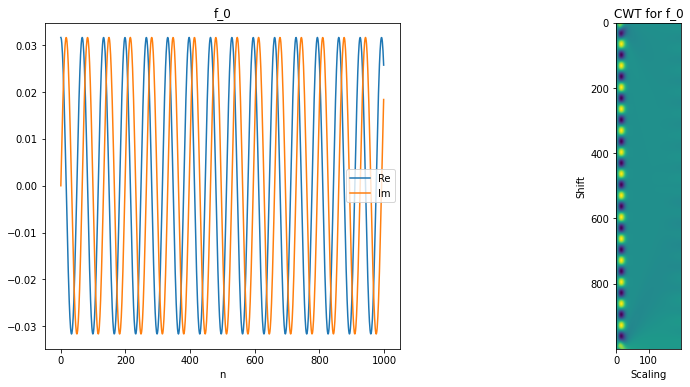

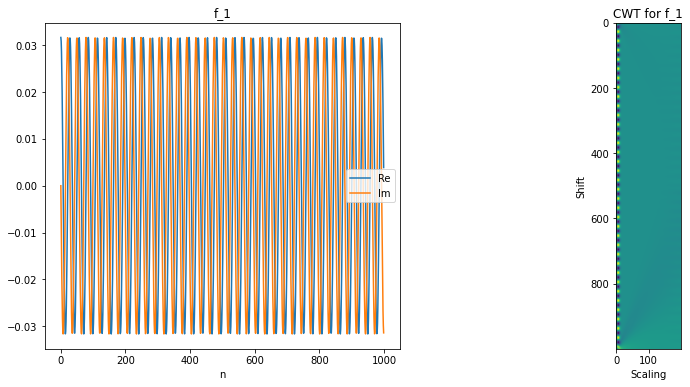

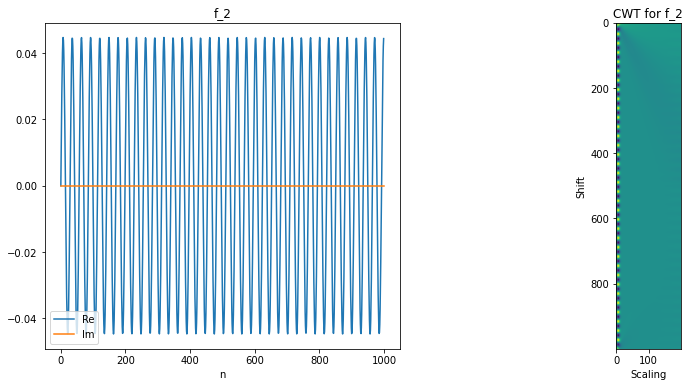

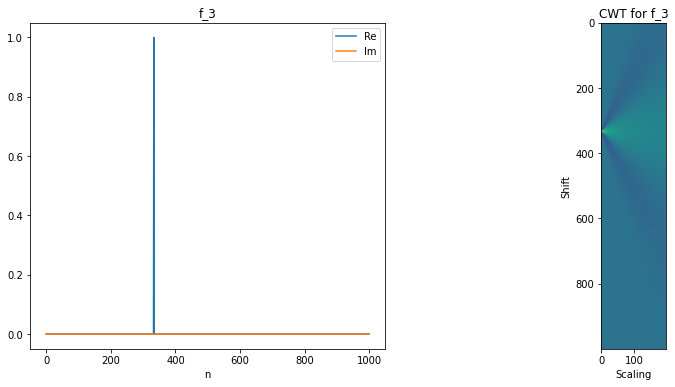

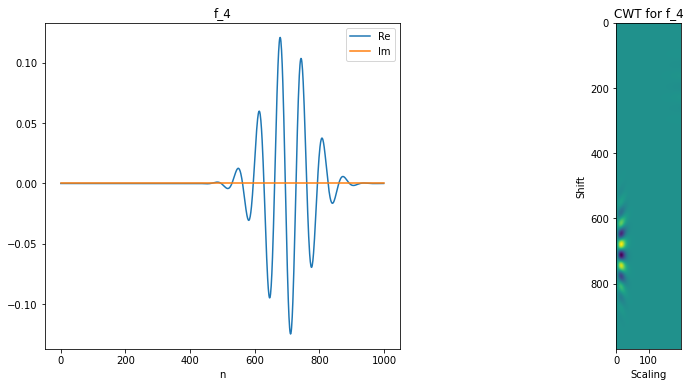

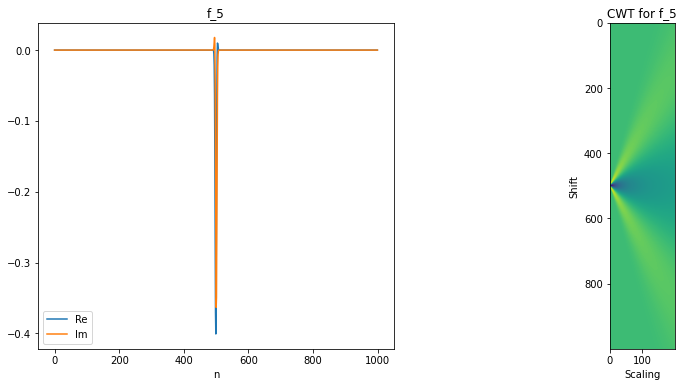

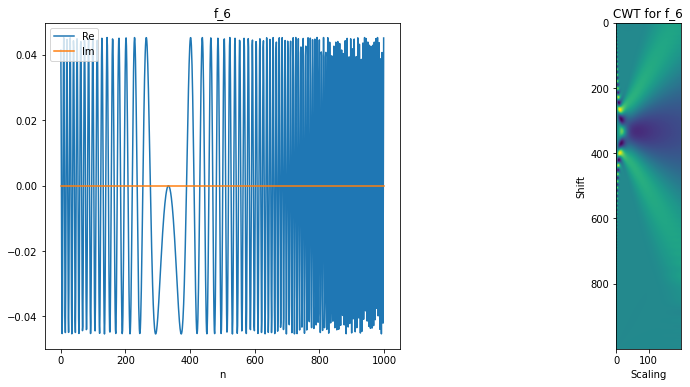

In [ ]:

widths = np.arange(1, 200)
for k in range(len(fList)):
    f = fList[k]
    f /= np.sqrt(np.sum(f.real**2+f.imag**2))
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(f.real, label='Re')
    plt.plot(f.imag, label='Im')
    plt.xlabel('n')
    plt.legend()
    plt.title('f_%d' %(k))





    S = get_S(f)
    P = scs.cwt(f, scs.ricker, widths)
    #plt.figure()
    plt.subplot(1,2,2)
    plt.imshow(P.T)
    plt.xlabel('Scaling')
    plt.ylabel('Shift')
    plt.title('CWT for f_%d' %(k))

# Integral Equations

The linear integral equation generally is
$$
			g(\mathbf{x})y(\mathbf{x}) - Ay(\mathbf{x}) = f(\mathbf{x})
$$
Here $A$ is an integral operator, which can be expressed as follows:
$$
			Ay(\mathbf{x}) = \lambda\int\limits_{\Omega} K(\mathbf{x},\xi) y(\xi) d\xi
$$

* $\Omega$ is some domain (may represent the whole space).
* $K(\mathbf{x},\xi)$  is a Kernel.
* $y(\mathbf{x})$ is unknown function to be found.
* $f(\mathbf{x})$ is a right-hand side.



## Integral equations of first and second kind

The linear integral equation generally is
$$
			g(\mathbf{x})y(\mathbf{x}) - Ay(\mathbf{x}) = f(\mathbf{x})
$$


* **The integral equation of the first kind:** $g(\mathbf{x})\equiv 0$.
$$
				Ay(\mathbf{x}) = f(\mathbf{x})
$$
These equations are commonly ill-posed.
* **The integral equation of the second kind:**
$$
				y(\mathbf{x}) - \lambda Ay(\mathbf{x}) = f(\mathbf{x}).
$$
These equations are commonly well-posed.

## Homogeneous and heterogeneous integral equations

The linear integral equation generally is
$$
			g(\mathbf{x})y(\mathbf{x}) - Ay(\mathbf{x}) = f(\mathbf{x})
$$


* Homogeneous equation: $f(\mathbf{x})\equiv 0$. \\
Homogeneous IE with $g(\mathbf{x})\equiv 1$ are eigenvalues problems.
* Heterogeneous equation: $f(\mathbf{x})\neq 0$.

## Volterra and Fredholm IE
The linear integral equation generally is
$$
			g(\mathbf{x})y(\mathbf{x}) - Ay(\mathbf{x}) = f(\mathbf{x})
$$
Here $A$ is an integral operator, which can be expressed as follows:
$$
			Ay(\mathbf{x}) = \lambda\int\limits_{\Omega} K(\mathbf{x},\xi) y(\xi) d\xi
$$

* **Volterra IE:** the domain $\Omega$ is changeable domain. The 1D example:
$$
				y(x) - \int\limits_0^{x} K(x, s) y(s) ds = f(x)
$$
* **Fredholm IE:** the domain $\Omega$ is a constant domain.

### Simple integration
Consider the integration problem:
$$
		f'(x) = g(x), 0\le x \le 1
$$
In order to calculate antiderivative, we have to integrate the latter equation with Volterra differential operator:
$$
		f(x) = f(0) + \int\limits_0^x g(\xi)d\xi.
$$
or
$$
		f(x) = f(1) - \int\limits_x^1 g(\xi)d\xi.
$$


